In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline, AutoTokenizer # basic, autoTokinizer, DistilBertForSequenceClassifier, 

import plotly.graph_objects as go

import streamlit as st

import torch
import fire

import concurrent.futures
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

/Users/iffiness/.pyenv/versions/3.10.12/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pip freeze > requirements.txt

# Sentiment Analysis of Amazon Reviews
<!-- precision and recall of 0.916 -->
## Tools  
- Python
- Pytorch (_Deep Learning model_)
- Seaborn (_statistical visualizations_)
- NLTK (_Machine Learning and Text Analysis_)

Now this looks cleaner and more manageable.  
Now looking at the count of each rating.

In [8]:
from app_scripts.load_preprocess_data import load_data, preprocess_data, get_sentiment, plot_ratings

data1 = load_data(file_loc='assets/data1.csv')
# data = preprocess_data(data)
# data1 = get_sentiment(data1)
# plot_ratings(data1)


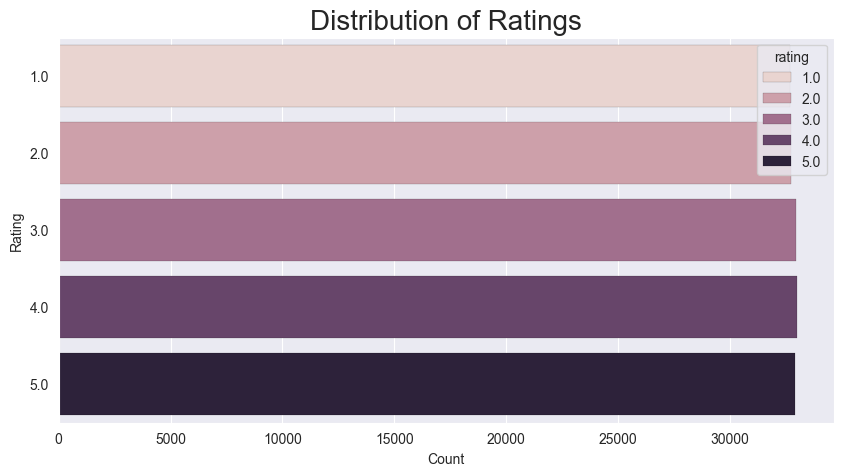

In [4]:

data = load_data(file_loc='assets/data1.csv')
# data = preprocess_data(data)
data = get_sentiment(data)
plot_ratings(data)


In [9]:
data1.head(3)

,column_0,column_1,column_2,column_3,column_4,column_5
0,4.0,Surprisingly delightful,This is a fast read filled with unexpected hum...,NaN,NaN,NaN
1,2.0,"Works, but not as advertised",I bought one of these chargers..the instructio...,NaN,NaN,NaN
2,2.0,Oh dear,I was excited to find a book ostensibly about ...,NaN,NaN,NaN


In [11]:
data1.sample(frac=.045).to_csv('assets/data.csv', index=False)
display(data1.head(5))
print(data1.sample(1))

,column_0,column_1,column_2,column_3,column_4,column_5
0,4.0,Surprisingly delightful,This is a fast read filled with unexpected hum...,NaN,NaN,NaN
1,2.0,"Works, but not as advertised",I bought one of these chargers..the instructio...,NaN,NaN,NaN
2,2.0,Oh dear,I was excited to find a book ostensibly about ...,NaN,NaN,NaN
3,2.0,Incorrect disc!,"I am a big JVC fan, but I do not like this mod...",NaN,NaN,NaN
4,2.0,Incorrect Disc,"I love the style of this, but after a couple y...",NaN,NaN,NaN


         column_0 column_1 column_2  column_3                  column_4  \
2906394       NaN      NaN      NaN       5.0  beautiful and functional   

                                                  column_5  
2906394  this wine rack is beautiful and functional wit...  


Seems like column_0 and column_3 are numeric columns while the others are text where either column_0 is populated or column_3 is.  
So I don't think it is far-fetched to merge the columns such that:
- column_0 and column_3 are a single column
- column_1, column_2, column_4, column_5 are the text columns

In [ ]:
from app_scripts.model import huggingface_autoTokenizer, huggingFace_Distilbert

data = data.sample(frac =.009).reset_index(drop=True)
# data = data.sample(20).reset_index(drop=True)

data = huggingface_autoTokenizer(data)
data = huggingFace_Distilbert(data)
data.shape, data.sample(4)


### TODO:
- Plot the ratings.
   - For each sentence, find the main topic of the text as in what the complain is talking about. 
- Interactively show what each point is mainly about. A scatter plot would be perfect to individually pick each point.
- Include a single value for a general rating for each single sentiment

In [ ]:
display(data, data.shape)

In [ ]:
from app_scripts.topic_modelling import get_topics, get_common_topics, plot_topic_repetitions, plot_topic_vs_ratings
import pandas as pd

data = get_topics(data)
data = get_common_topics(data)

plot_topic_repetitions(data)
plot_topic_vs_ratings(data)


In [ ]:
from app_scripts.topic_modelling import plot_interactive_ratings

plot_interactive_ratings(data)

data.sample(10)

In [ ]:
# - Interactively show what each point is mainly about. A scatter plot would be perfect to individually pick each point.
import plotly.graph_objects as go

def plot_interactive_ratings(data):
    max_ratings_by_topic = data[data.common_topics.isin(data.common_topics.value_counts()[data.common_topics.value_counts() > 10].index)].groupby('common_topics')['rating'].mean().reset_index()
    
    # Create a scatter plot
    fig = go.Figure(data=go.Scatter(
        x=max_ratings_by_topic['rating'],  # Use the ratings as x-values
        y=max_ratings_by_topic['common_topics'],  # Use the common_topics as y-values
        mode='markers',  # Set the mode to markers for a scatter plot
        marker=dict(
            color=max_ratings_by_topic['rating'],  # Color the markers based on the ratings
            # colorscale='turbo',  # Choose a color scale
            # colorbar=dict(title='Ratings'),  # Add a color bar with a title
            size=10  # Set the marker size
        )
    ))
    
    # Customize the layout
    fig.update_layout(
        title='Common Topics and Average Ratings',  # Add a title
        xaxis_title='Ratings',  # Label the x-axis
        yaxis_title='Common Topics',  # Label the y-axis
        font=dict(size=10),  # Set the font size
        height=1000,  # Set the height of the plot
    )

    fig.update_yaxes(automargin=True)
    
    # Show the interactive scatter plot
    fig.show()

# plot_interactive_ratings(data)